# Handwriting digits recognition using ANN 

> pre-processing

In [0]:
# necessary settings:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [0]:
# import library:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
from time import time

In [0]:
# get colab setting
import os
from google.colab import drive

> Data pre-processing
- data transform
- data download
- data split
- data preview

In [0]:
# get data : 

from torchvision import datasets,transforms
#  data transform: 1: to the form tensor image require / 2: normalize data(mean and standard deviation)
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))]) 


# Download and load the training data
# datasets.MNIST(root,download,train(train/test),transform())
trainset = datasets.MNIST('drive/My Drive/mnist/MNIST_data/', download=True, train=True, transform=transform)
valset = datasets.MNIST('drive/My Drive/mnist/MNIST_data/', download=True, train=False, transform=transform)


  0%|          | 0/9912422 [00:00<?, ?it/s]

9920512it [00:03, 2955088.67it/s]                             


Extracting drive/My Drive/mnist/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to drive/My Drive/mnist/MNIST_data/MNIST/raw


32768it [00:00, 328523.89it/s]
0it [00:00, ?it/s]

Extracting drive/My Drive/mnist/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to drive/My Drive/mnist/MNIST_data/MNIST/raw


1654784it [00:02, 815412.39it/s]                             
8192it [00:00, 127593.34it/s]


Extracting drive/My Drive/mnist/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to drive/My Drive/mnist/MNIST_data/MNIST/raw
Extracting drive/My Drive/mnist/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to drive/My Drive/mnist/MNIST_data/MNIST/raw
Processing...
Done!


In [0]:
# torch.utils.data.DataLoader(data,batch_size,shuffle)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

In [0]:
# Data preview:
# data size
dataiter = iter(trainloader)
images, labels = dataiter.next()  # first batch 
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


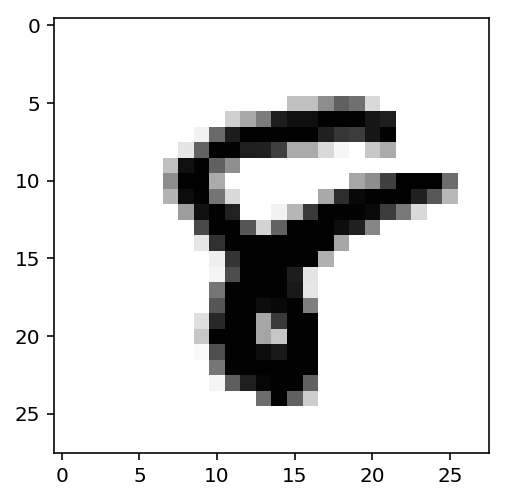

In [0]:
# data view1:
plt.imshow(images[6].numpy().squeeze(),cmap="gray_r")

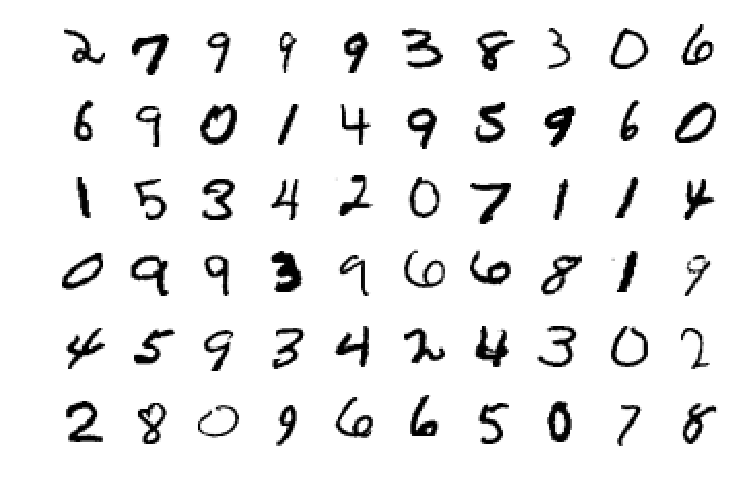

In [0]:
# data view2:
figure=plt.figure()
for i in range(60):
  plt.subplot(6,10,i+1)
  plt.axis("off")
  plt.imshow(images[i].numpy().squeeze(),cmap="gray_r")

> Data training

- ANN training

In [0]:
from torch import nn
# build ann structure:
layer=[28*28,128,64,10]

model=nn.Sequential(nn.Linear(layer[0],layer[1]),
        nn.ReLU(),
        nn.Linear(layer[1],layer[2]),
        nn.ReLU(),
        nn.Linear(layer[2],layer[3]),
        nn.LogSoftmax(dim=1))
        

In [0]:
# train ANN :
# loss function / optimizor(update weight)
from torch import optim
criterion = nn.NLLLoss() 
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
epoches=15
time0=time()

# epoches:
for i in range(1,epoches):
  run_loss=0.0
  # batch size 
  for images,labels in trainloader:
    # process image data
    images=images.view(images.shape[0],-1)
    # clear the gradient accumulation in optimizer between each batch 
    optimizer.zero_grad()
    output=model(images)
    loss=criterion(output,labels)
    loss.backward()
    optimizer.step()
    run_loss+=loss.item()
  else:
    print("Epoch {} - Training loss: {}".format(i, run_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

    
    
    

Epoch 1 - Training loss: 0.6347961096780133
Epoch 2 - Training loss: 0.2780656685421208
Epoch 3 - Training loss: 0.2174671459426758
Epoch 4 - Training loss: 0.17465388482170446
Epoch 5 - Training loss: 0.1459990785395635
Epoch 6 - Training loss: 0.1248291679747355
Epoch 7 - Training loss: 0.10896592309225851
Epoch 8 - Training loss: 0.09721093256669894
Epoch 9 - Training loss: 0.08652106296173784
Epoch 10 - Training loss: 0.07857232882744515
Epoch 11 - Training loss: 0.07137667696907131
Epoch 12 - Training loss: 0.0661793975343209
Epoch 13 - Training loss: 0.06168200404493452
Epoch 14 - Training loss: 0.05674137541952767

Training Time (in minutes) = 3.2630529403686523


> Evaluate the ANN:
- visualize some examples
- use validate datasets

In [0]:
# visualize :

def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Predicted Digit = 7


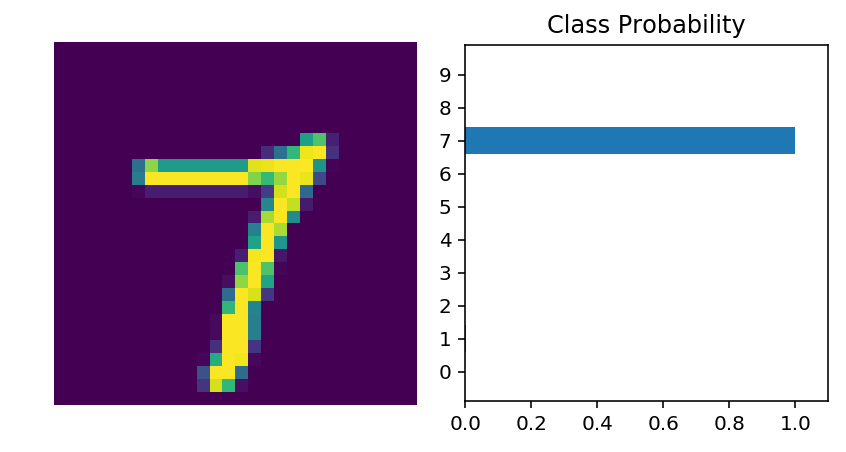

In [0]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)


# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

In [0]:
# vallidate set

correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    # Turn off gradients to speed up this part
    with torch.no_grad():
        logps = model(img)

    # Output of the network are log-probabilities, need to take exponential for probabilities
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9735


> Problem and Feedback

## overview process:
- Data process:download/load(train/val)/pre-process(transform/normalize/to tensor/batchsize)
- Construct ANN: layers/activate function/predict function/loss function/ optimizer
- Train: epoches/batch/ PS:gradient_0 
- Evalute: visualize / validation 

## Notes:
- how to transforms data 
- how to load data
- how to construct nn in torch
- how to train: gradient_0 / feedforward/ loss/backforwar/update 